## Fitting a linear regression model with TensorFlow

**Goal:** In this notebook you will see how to use TensorFlow to fit the parameters (slope and intercept) of a simple linear regression model via gradient descent (GD). 

**Usage:** The idea of the notebook is that you try to understand the provided code by running it, checking the output and playing with it by slightly changing the code and rerunning it. 

**Dataset:** You work again with the systolic blood pressure and age data of 33 American women, which is generated and visualized in the upper part of the notebook. 

**Content:**

* fit a linear model via the sklearn machine learning library of python to get the fitted values of the intercept and slope as reference. 

* use the TensorFlow library to fit the parameter of the simple linear model via GD with the objective to minimize the MSE loss. 
    * define the computational graph of the model
    * define the loss and the optimizer
    * visualize the computational graph in tensorboard
    * fit the model parameters via GD and check the current values of the estimated model parameters and the loss after each updatestep
    * verify that the estimated parameters converge to the values which you got from the sklearn fit.  


[open in colab](https://colab.research.google.com/github/tensorchiefs/dl_book/blob/master/chapter_03/nb_ch03_03_tf2_version.ipynb)


#### Install correct TF version (colab only)

In [1]:
# Execute this cell to be sure to have a compatible TF (2.0) version. 
# If you are bold you can skip this cell. 
try: #If running in colab 
  import google.colab
  !pip install tensorflow==2.0.0
except:
  print('Not running in colab')

#### Imports

In [2]:
try: #If running in colab 
    import google.colab
    IN_COLAB = True 
    %tensorflow_version 2.x
except:
    IN_COLAB = False

In [3]:
import tensorflow as tf
if (not tf.__version__.startswith('2')): #Checking if tf 2.0 is installed
    print('Please install tensorflow 2.0 to run this notebook')
print('Tensorflow version: ',tf.__version__, ' running in colab?: ', IN_COLAB)

Tensorflow version:  2.0.0  running in colab?:  True


In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('default')
from sklearn.linear_model import LinearRegression

Here we read in the systolic blood pressure and the age of the 33 American women in our dataset. Then we use the sklearn library to find the optimal values for the slope a and the intercept b.

In [5]:
# Blood Pressure data
x = [22, 41, 52, 23, 41, 54, 24, 46, 56, 27, 47, 57, 28, 48, 58,  9, 
     49, 59, 30, 49, 63, 32, 50, 67, 33, 51, 71, 35, 51, 77, 40, 51, 81]
y = [131, 139, 128, 128, 171, 105, 116, 137, 145, 106, 111, 141, 114, 
     115, 153, 123, 133, 157, 117, 128, 155, 122, 183,
     176,  99, 130, 172, 121, 133, 178, 147, 144, 217] 
x = np.asarray(x, np.float32) 
y = np.asarray(y, np.float32)

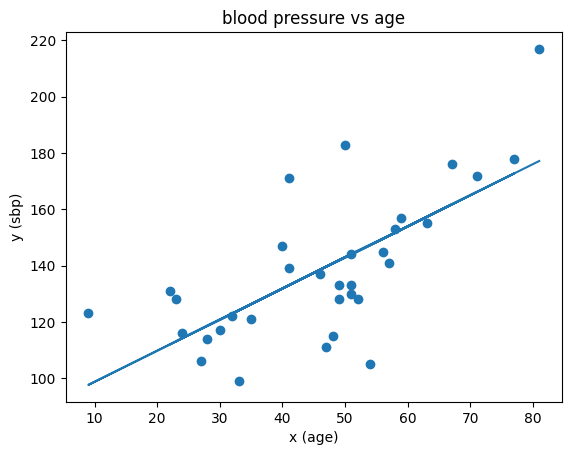

intercept =  87.67143 solpe =  1.1050216


In [6]:
plt.scatter(x=x,y=y)
plt.title("blood pressure vs age")
plt.xlabel("x (age)")
plt.ylabel("y (sbp)")

model = LinearRegression()
res = model.fit(x.reshape((len(x),1)), y)
predictions = model.predict(x.reshape((len(x),1)))
plt.plot(x, predictions)
plt.show()
print("intercept = ",res.intercept_,"solpe = ", res.coef_[0],)

## Tensorflow

We now use Tensorflow to first define the computational graph, then we will run the graph and automatically get the gradients of the loss w.r.t the variables to update them.

In [7]:
import tensorflow as tf
print(tf.__version__)

2.0.0


#### In Tensorflow we need to define the computational graph first



#### Listing 3.2  Construction of the computational graph in TensorFlow                                                                                                              


In [8]:
# x,y are one dimensional numpy arrays
# Defining the graph (construction phase)

@tf.function
def my_func(a_, b_):
  x_  = tf.constant(x, name='x_const')                       # Constants, these are fixed tensors holding the data values and cannot be changed by the optimization
  y_  = tf.constant(y, name='y_const')  

  y_hat_ = a_*x_ + b_                                        # we symbolically calculate y_hat    
  loss_ = tf.reduce_mean(tf.square(y_ - y_hat_))             #The final result, the MSE. Still symbolical
  return loss_



a_  = tf.Variable(0.0, name='a_var')                       # Variables, with starting values, will be optimized later
b_  = tf.Variable(139.0, name='b_var')                     # we name them so that they look nicer in the graph

logdir="linreg/"
writer = tf.summary.create_file_writer(logdir)
#writer = tf.summary.FileWriter("linreg/", tf.get_default_graph())
#writer.close()
tf.summary.trace_on(graph=True, profiler=True)
z = my_func(a_, b_)   #needs one call to write the graph
with writer.as_default():
  tf.summary.trace_export( 
      name="test",
      step=0,
      profiler_outdir=logdir)

In [9]:
!ls linreg

events.out.tfevents.1598869055.8447c0dd6df2.152.19.v2	   plugins
events.out.tfevents.1598869055.8447c0dd6df2.profile-empty


#### Displaying the computational graph in TensorBord with colab

If you are using colab, it's currently (November 2018), there is no straight forward way to show the graph in TensorBoard. However, there is the possibility to tunnel from colab to your local machine. See  https://www.dlology.com/blog/quick-guide-to-run-tensorboard-in-google-colab/ or https://stackoverflow.com/questions/47818822/can-i-use-tensorboard-with-google-colab. We will need to install some things, just run the next 3 cells.

In [10]:
! wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
! unzip ngrok-stable-linux-amd64.zip

--2020-08-31 10:17:40--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 34.225.3.211, 34.230.212.40, 18.213.76.145, ...
Connecting to bin.equinox.io (bin.equinox.io)|34.225.3.211|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13773305 (13M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip’

ngrok-stable-linux- 100%[===================>]  13.13M  69.1MB/s    in 0.2s    

2020-08-31 10:17:40 (69.1 MB/s) - ‘ngrok-stable-linux-amd64.zip’ saved [13773305/13773305]

Archive:  ngrok-stable-linux-amd64.zip
  inflating: ngrok                   


In [11]:
# Start Tensor Board
LOG_DIR = './linreg'
get_ipython().system_raw(
    'tensorboard --logdir {} --host 0.0.0.0 --port 6006 &'
    .format(LOG_DIR)
)

Now you can click on the link below and a new window will open where you can see the computational graph in Tensorboard

In [13]:
# Start the tunnel
get_ipython().system_raw('./ngrok http 6006 &')

# Tell the ip so that one can click on it
! curl -s http://localhost:4040/api/tunnels | python3 -c \
    "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"

https://824c5916c8da.ngrok.io


####Let's run the Graph and feed our start values for slope a and intercept b and fetch the mse loss


#### Listing 3.3  Let the tensors flow, a feed-forward pass                                                                                                              

In [14]:
#sess = tf.Session()                            # Starts a session and grabs memory and other resources
#res_val = sess.run([loss_,], {a_:0,b_:139})    # Letting the variables a=0 b=139 flow through the graph
#print(res_val)
#sess.close()                                   # Don't forget to close the session

res_val =my_func(0, 139)
res_val
res_val.numpy()

673.4545

Now we add an optimizer (gradient descent) to the graph and opimize the slope a and the intercept b. The start values are a=0 and b=139 (139 is the mean of the blood pressure and slope a=0 implies that the model predicts the mean for each age). Our learning rate is 0.0004 and we do 80000 updatesteps.

#### Listing 3.5  Fitting the computational graph in TensorFlow                                                                                                                     


In [15]:
#train_op_ = tf.train.GradientDescentOptimizer(learning_rate=0.0004).minimize(loss_) #A
#with tf.Session() as sess: # B
#    sess.run(tf.global_variables_initializer()) # C
#    for i in range(80000): # D
#      _, mse, a_val, b_val = sess.run([train_op_, loss_, a_, b_]) # E
#      if (i % 5000 == 0): # F
#        print(a_val, b_val, mse)
#        
#        
optimizer = tf.keras.optimizers.SGD(0.0004)
for i in range(80000): 
  with tf.GradientTape() as tape:
    loss = my_func(a_,b_)
    gradients = tape.gradient(loss, [a_,b_])
    optimizer.apply_gradients(zip(gradients,[a_,b_]))  
  if (i % 5000 == 0): 
        print("Epoch:",i, "slope=",a_.numpy(),"intercept=",b_.numpy(), "mse=", loss.numpy())

Epoch: 0 slope= 0.22123638 intercept= 138.99971 mse= 673.4545
Epoch: 5000 slope= 0.47009143 intercept= 120.60784 mse= 469.57272
Epoch: 10000 slope= 0.6975813 intercept= 108.807014 mse= 398.76877
Epoch: 15000 slope= 0.8435634 intercept= 101.23433 mse= 369.61255
Epoch: 20000 slope= 0.9372412 intercept= 96.37488 mse= 357.6062
Epoch: 25000 slope= 0.99735403 intercept= 93.256584 mse= 352.66214
Epoch: 30000 slope= 1.0359306 intercept= 91.25547 mse= 350.62622
Epoch: 35000 slope= 1.0606831 intercept= 89.97145 mse= 349.78793
Epoch: 40000 slope= 1.0765644 intercept= 89.14761 mse= 349.4427
Epoch: 45000 slope= 1.0867523 intercept= 88.61913 mse= 349.30048
Epoch: 50000 slope= 1.0932869 intercept= 88.28015 mse= 349.242
Epoch: 55000 slope= 1.0975146 intercept= 88.060844 mse= 349.21765
Epoch: 60000 slope= 1.1001551 intercept= 87.923874 mse= 349.20798
Epoch: 65000 slope= 1.1018678 intercept= 87.83504 mse= 349.20377
Epoch: 70000 slope= 1.1029379 intercept= 87.77952 mse= 349.20218
Epoch: 75000 slope= 1.10

Let's look at the final values for the slope a and the intercept b. We know form the closed formula solution that:

1.   optimal value for a:   1.1050216
2.   optimal value for b:   87.67143
3.   minimal loss:         349.200787168560

After 80000 update steps we are very close to the optimal values


In [16]:
 print(a_.numpy(), b_.numpy(), loss.numpy())


1.1041987 87.71413 349.20105
